# Sampling

## Theta

In [2]:
from configs.vp.nc_ddpmpp import get_config
config = get_config()

In [4]:
from utils import save_checkpoint, load_checkpoint, restore_checkpoint
from models import utils as mutils
from run_lib import _sample_fn

In [6]:
ckptdir = 'workdir/nc-theta/checkpoints/checkpoint_1.pth'

In [7]:
score_model = mutils.create_model(config)
score_model = load_checkpoint(ckptdir, score_model, config.device)

print(f"begin: {config.data.category} - {config.data.image_size}")
sample, n = _sample_fn(config, score_model)

In [11]:
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
import numpy as np

In [19]:
nrow = int(np.sqrt(sample.shape[0]))
image_grid = make_grid(sample, nrow, padding=0)
print(image_grid.shape, image_grid.min(), image_grid.max())

torch.Size([3, 512, 512]) tensor(-17.8850, device='cuda:0') tensor(15.0951, device='cuda:0')


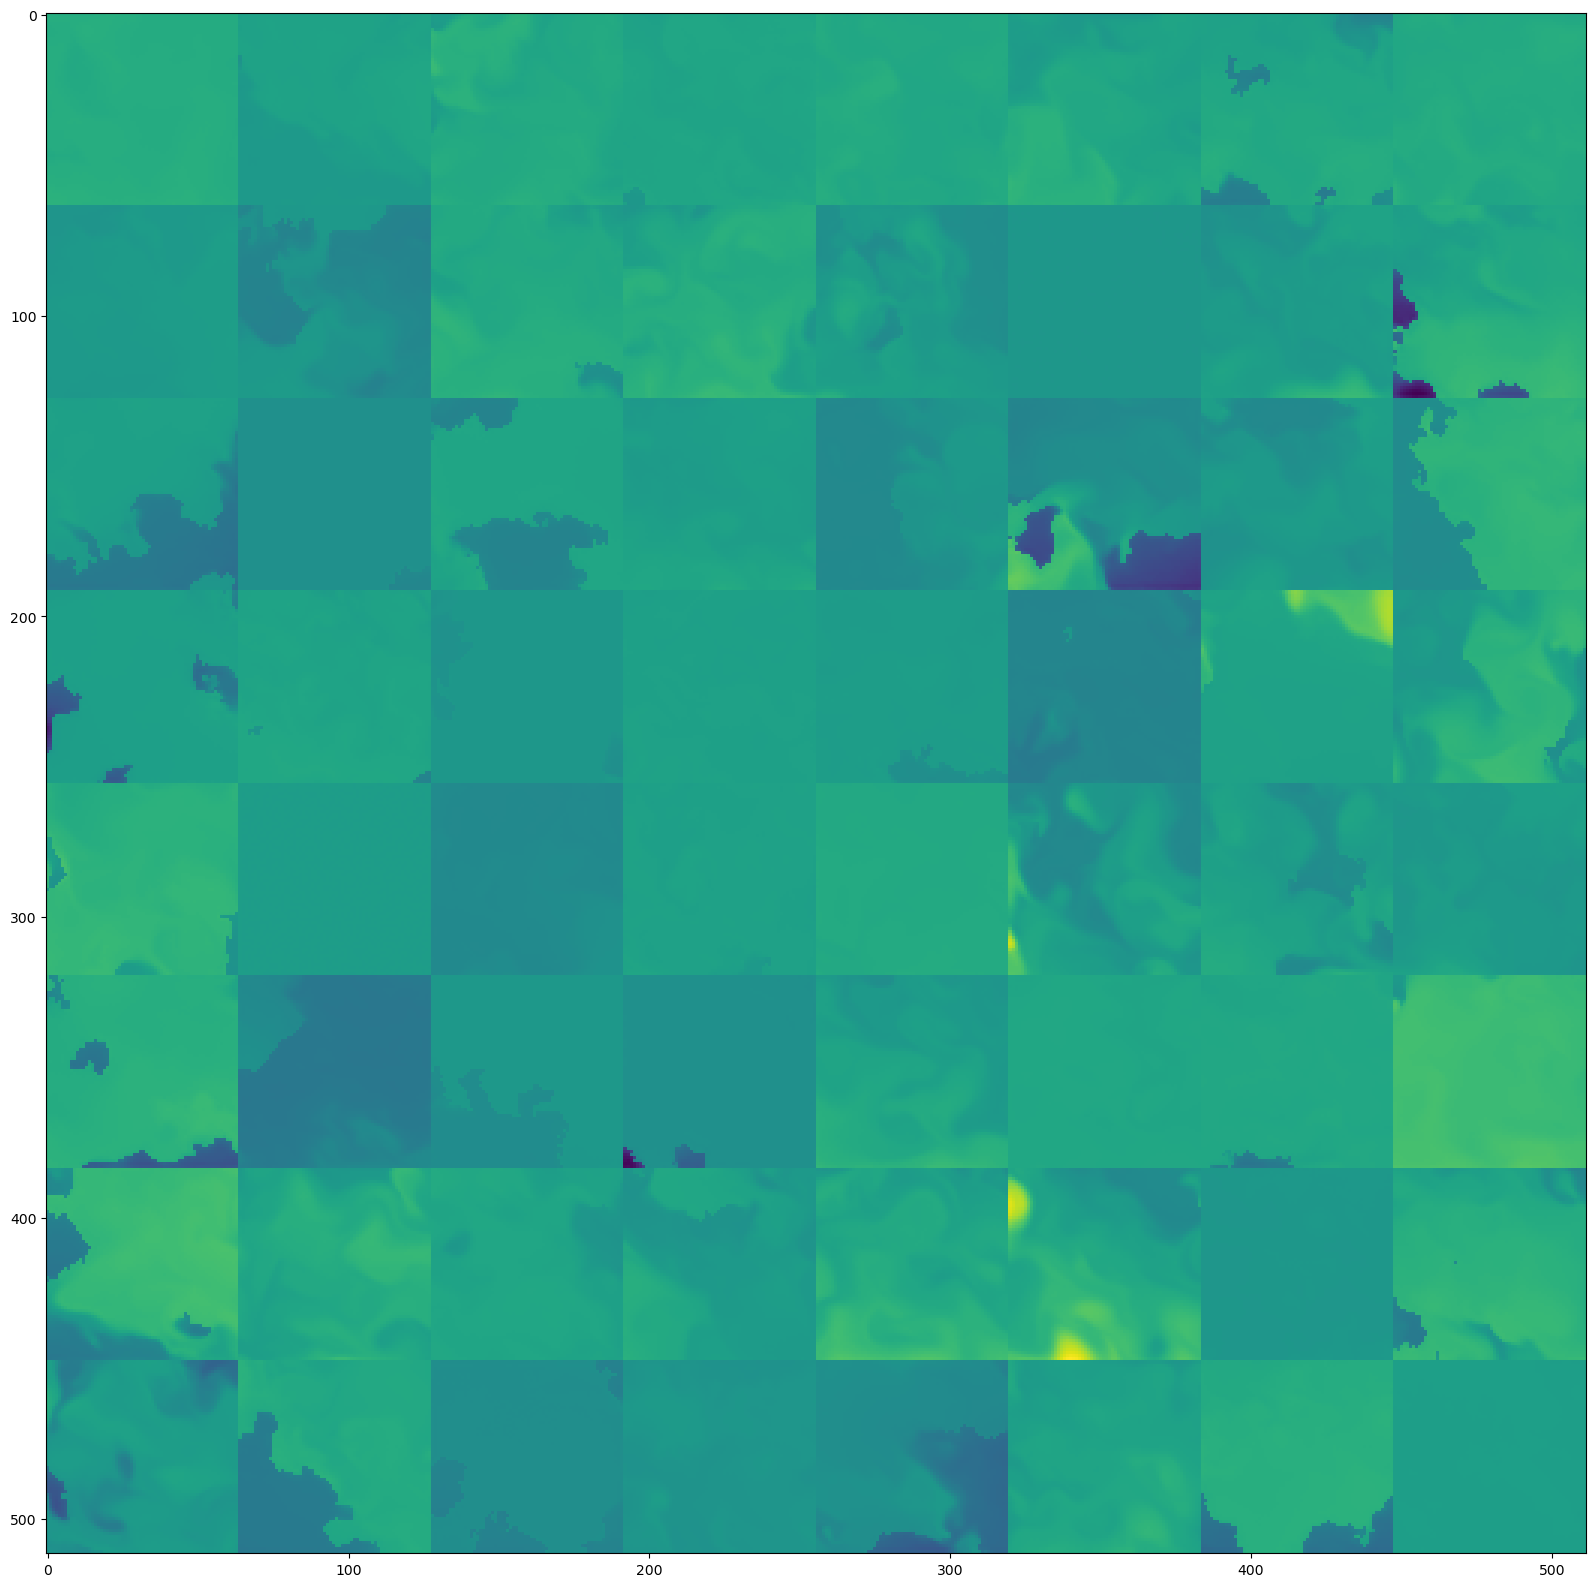

In [23]:
fig, axe = plt.subplots(nrows=1, ncols=1,figsize=(20,20))
axe.imshow(image_grid[0].cpu())